In [1]:
from datacube import Datacube
import matplotlib.pyplot as plt
import numpy as np

cdc = Datacube(config='/g/data/u46/users/ext547/ewater/cambodia_cube/cambodia.conf')

In [11]:
#Define function to create subplots of all scenes within an array as subplots
def one_band_image_subplots(ds, num_cols, figsize = [10,40], left  = 0.125, 
                              right = 0.9, bottom = 0.1, top = 0.9, 
                              wspace = 0.2, hspace = 0.4):
    '''
    one_band_image_subplots takes a dataset with one band and multiple time steps, 
    and plots them in image. 
    Last modified: March 2018
    Author: Mike Barnes
    Modified by: Claire Krause and Erin Telfer
    
    Inputs: 
    ds -   Dataset containing the bands to be plotted
    num_cols - number of columns for the subplot
    
    Optional:
    figsize - dimensions for the output figure
    left  - the space on the left side of the subplots of the figure
    right - the space on the right side of the subplots of the figure
    bottom - the space on the bottom of the subplots of the figure
    top - the space on the top of the subplots of the figure
    wspace - the amount of width reserved for blank space between subplots
    hspace - the amount of height reserved for white space between subplots
    '''
    # Find the number of rows/columns we need, based on the number of time steps in ds
    fig = plt.figure(figsize = figsize)
    timesteps = ds.time.size
    num_rows = int(np.ceil(timesteps/num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)
    fig.subplots_adjust(left  = left, right = right, bottom = bottom, top = top, 
                        wspace = wspace, hspace = hspace)
    try: #loop through all scenes, prepare imagery and create subplots
        for i, ax in enumerate(fig.axes):
            image_ds = ds.PET.isel(time =i)
            ax.set_title(str(image_ds.time.values)[0:10])
            ax.imshow(image_ds, interpolation = 'nearest') #plot image as subplot
    except IndexError: #if there are an odd number of plots, this code will allow plotting of images
        fig.delaxes(ax)
        plt.draw() 

In [18]:
ds= cdc.load(product='pet_grids_1979_2016')

In [22]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 13, longitude: 14, time: 13880)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T10:30:00 1979-01-02T10:30:00 ...
  * latitude   (latitude) float64 15.25 14.75 14.25 13.75 13.25 12.75 12.25 ...
  * longitude  (longitude) float64 101.8 102.2 102.8 103.2 103.8 104.2 104.8 ...
Data variables:
    PET        (time, latitude, longitude) float32 4.871423 4.67987 ...
Attributes:
    crs:      EPSG:4326

In [28]:
ds_subset = ds.isel(time=slice(365,600))

<Figure size 1440x14400 with 0 Axes>

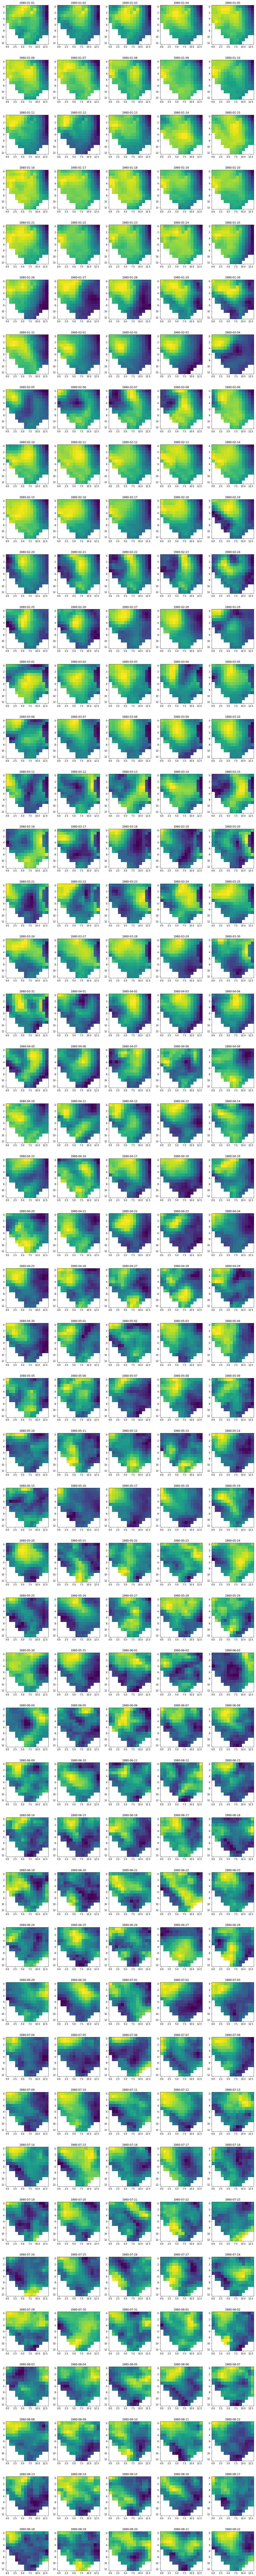

In [29]:
one_band_image_subplots(ds_subset, 5, figsize = [20,200], left  = 0.125, 
                              right = 0.9, bottom = 0.1, top = 0.9, 
                              wspace = 0.2, hspace = 0.4)